In [9]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

# Physical Activity and Heart Disease 
#### by Ismail Salim and Alleanna Clark

This project looks at physical activity and risks for cardiovascular disease based on data from the Centers for Disease Control and Prevention. We were interested in seeing if there is a difference in various parts of the country and whether or not there is an association between physical activity (which is measures by walking/biking to work in the dataset). This could affect our results because it does not take into account other physical activity however it is a consistent form of exercise that can be answered in a simple yes/no question. 

### Preprocessing

In [10]:
# read csv files
disease_df = pd.read_csv("Behavioral_Risk_Factor_Data__Heart_Disease___Stroke_Prevention.csv")
activity_df = pd.read_csv("Nutrition__Physical_Activity__and_Obesity_-_American_Community_Survey.csv")

FileNotFoundError: File b'Behavioral_Risk_Factor_Data__Heart_Disease___Stroke_Prevention.csv' does not exist

### Cleaning the Activity DataFrame

In [ ]:
# shape of activity dataframe
activity_df.shape

In [11]:
# column names
activity_df.columns

NameError: name 'activity_df' is not defined

In [12]:
# print unique values
for i in activity_df.columns:
    print(i)
    print(activity_df[i].unique())

NameError: name 'activity_df' is not defined

In [13]:
# get 4 useful columns
clean_activity = activity_df[["YearStart","YearEnd","Data_Value", "LocationDesc"]]

NameError: name 'activity_df' is not defined

In [14]:
clean_activity.head()

NameError: name 'clean_activity' is not defined

In [8]:
# type of data in column
for i in clean_activity.columns:
    print(type(clean_activity[i][0]))

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'str'>


In [9]:
# select rows where activity recorded in 2011
activity_2011 = clean_activity.loc[clean_activity["YearStart"] == 2011]

In [10]:
# remove rows where state is Puerto Rico and National and Washington DC
activity_2011 = activity_2011[activity_2011["LocationDesc"] != "Puerto Rico"]
activity_2011 = activity_2011[activity_2011["LocationDesc"] != "National"]
activity_2011 = activity_2011[activity_2011["LocationDesc"] != "District of Columbia"]

# select only the two important columns
activity_2011 = activity_2011[["LocationDesc", "Data_Value"]]

In [11]:
# reset index
activity_2011 = activity_2011.reset_index()

In [12]:
# drop misc index label column
activity_2011.drop("index", 1, inplace = True)

In [13]:
# cahnging column names
activity_2011.columns = ["State", "Value"]

In [14]:
activity_2011

,State,Value
0,Alabama,1.2
1,Alaska,8.8
2,Arizona,3.0
3,Arkansas,1.9
4,California,3.8
5,Colorado,4.3
6,Connecticut,3.4
7,Delaware,2.5
8,Florida,2.2
9,Georgia,1.8


### Cleaning the disease dataframe

In [15]:
disease_df.head()

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation
0,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
1,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,Overall,C1,T1,BR001,Crude,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)"
2,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,Crude,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
3,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Male,C1,T1,BR001,AgeStdz,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)"
4,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Gender,Female,C1,T1,BR001,AgeStdz,BOC02,GEN02,1,"(32.84057112200048, -86.63186076199969)"


In [16]:
# disease shape
disease_df.shape

(85800, 29)

In [17]:
# unique values of category column
print("Category column unique values:", disease_df["Category"].unique())
# unique values of topic column
print("Topic column unique values:", disease_df["Topic"].unique())

Category column unique values: ['Cardiovascular Diseases' 'Risk Factors']
Topic column unique values: ['Major Cardiovascular Disease' 'Stroke' 'Diabetes'
 'Acute Myocardial Infarction (Heart Attack)' 'Coronary Heart Disease'
 'Cholesterol Abnormalities' 'Nutrition' 'Obesity' 'Smoking'
 'Physical Inactivity' 'Hypertension']


In [18]:
# rows where category equal to cardiovascular diseases
cd = disease_df.loc[disease_df["Category"] == 'Cardiovascular Diseases']
# rows where topic equal to major cardiovascular disease
mcd = cd.loc[cd["Topic"] == 'Major Cardiovascular Disease']

In [19]:
mcd = mcd[mcd["Year"] == 2011]

In [20]:
# shape of mcd dataframe
mcd.shape

(1144, 29)

In [21]:
# column names
mcd.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'Datasource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Confidence_Limit_Low', 'Confidence_Limit_High', 'Break_Out_Category',
       'Break_out', 'CategoryID', 'TopicID', 'IndicatorID',
       'Data_Value_TypeID', 'BreakoutCategoryID', 'BreakOutID', 'LocationID',
       'GeoLocation'],
      dtype='object')

In [22]:
# value unit used
print("Value unit:", mcd["Data_Value_Unit"].unique())
print("Data Value Types:", mcd["Data_Value_Type"].unique())

Value unit: ['Percent (%)']
Data Value Types: ['Age-Standardized' 'Crude']


In [23]:
# select rows where value type is crude
mcd_crude = mcd.loc[mcd["Data_Value_Type"] == 'Crude']
# select rows where break out category is overall
mcd_crude = mcd_crude.loc[mcd["Break_Out_Category"] == 'Overall']

In [24]:
# selecting useful columns 
mcd_clean = mcd_crude[["Year", "LocationDesc", "Data_Value"]]

In [25]:
# remove rows with median of all states
mcd_clean = mcd_clean.loc[mcd_clean["LocationDesc"] != "Median of all states"]
# removing washington DC 
mcd_clean = mcd_clean.loc[mcd_clean["LocationDesc"] != "Washington, DC"]

In [26]:
# change column names
mcd_clean.columns = ["Year", "State", "Value"]

In [2]:
# reset index
mcd_clean = mcd_clean.reset_index()

NameError: name 'mcd_clean' is not defined

In [3]:
# drop misc index column
mcd_clean.drop("index", 1, inplace = True)

NameError: name 'mcd_clean' is not defined

In [4]:
# we are going to group by states and average across them
mcd_df = mcd_clean.groupby(["State"]).mean().reset_index()
mcd_df.drop(["Year"], 1, inplace = True)

NameError: name 'mcd_clean' is not defined

In [1]:
mcd_df.head()

NameError: name 'mcd_df' is not defined

## Question 1)

## Which state has the highest percentage of people who walk or ride their bike to work? 

In [31]:
activity_2011.sort_values("Value", ascending=False).head(1)

,State,Value
1,Alaska,8.8


Once we cleaned the data and ended up with a table including the state and the percentage of people who walk or ride their bike to work, we sorted the states by value and found the state with the highest percentage is Alaska.

## Question 2)

## Is there an association between physical activity and the prevalence of cardiovascular disease?

In [34]:
# joining the two dataframes
joined_df = activity_2011
joined_df["mcd_rate"] = mcd_df["Value"]
joined_df.columns = ["State", "activity_rate", "mcd_rate"]

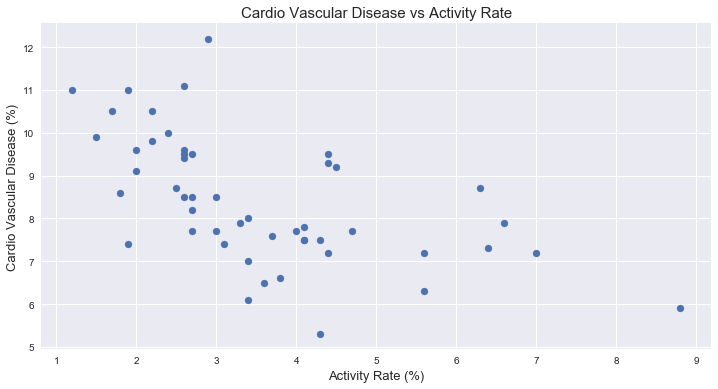

In [35]:
# plotting
plt.figure(figsize = (12,6))
plt.scatter(x=joined_df["activity_rate"], y=joined_df["mcd_rate"])
plt.title("Cardio Vascular Disease vs Activity Rate", size = 15)
plt.xlabel("Activity Rate (%)", size = 13)
plt.ylabel("Cardio Vascular Disease (%)", size = 13)

We can see from the chart that there seems to be some negative association between CVD rate and Activity Rate. Now we shall test for significance.

### Testing for significant linear correlation between CVD Rate and Activity Rate: 

Our assumptions:
- There is an absence of outliers.
- Variables are normally distributed.
- There is a relationship.
- Homoskedasticity (although this may slightly contentious on first inspection)

**Null Hypothesis:** There is no association between activity rate and cardio vascular disease.

**Alternative Hypothesis:** There is some association between activity rate and carido vascular disease.

In [36]:
from scipy.stats import pearsonr

In [37]:
test = pearsonr(joined_df["activity_rate"], joined_df["mcd_rate"])
print("The correlation coefficient is", test[0])
print("The p-value is", test[1])

The correlation coefficient is -0.5711487594735796
The p-value is 1.4806272243773362e-05


The p-value is extremely small. Even with a very small significance level, we can reject the null hypothesis. That is, **there is sufficient evidence to suggest that there is some association between the CVD rate and Activity rate.**

To answer question 2, we performed a hypothesis test on the data from both datasets (The physical activity in each state and the prominence of heart disease). The scatterplot shows a negative association which suggests that there is less cardiovascular disease where more people engage in physical activity. 

## Question 3)

## Can we predict the area of the US that a place is in given its characteristics of risk factors? 

First we must clean the location column, and group them into larger areas.

In [38]:
# only include 2011 values
disease_2011 = disease_df[disease_df["Year"] == 2011]

In [39]:
disease_df["Topic"].unique()

array(['Major Cardiovascular Disease', 'Stroke', 'Diabetes',
       'Acute Myocardial Infarction (Heart Attack)',
       'Coronary Heart Disease', 'Cholesterol Abnormalities', 'Nutrition',
       'Obesity', 'Smoking', 'Physical Inactivity', 'Hypertension'],
      dtype=object)

In [52]:
# remove median locationdesc
disease_2011 = disease_2011[disease_2011["LocationDesc"] != "Median of all states"]

# only include age standardised values 
disease_2011 = disease_2011[disease_2011["Data_Value_TypeID"] == "AgeStdz"]

## Create area target variable 

In [53]:
# get locations using regex and find lats and longs
locations = disease_2011["GeoLocation"]
lats = locations.str.extract("(?<=\s)(.*?)(?=\.)").astype(int)
longs = locations.str.extract("(?<=\()(.*?)(?=\.)").astype(int)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [59]:
def area_us(lat):
    """
    Returns area wrt USA according to a latitude
    """
    if lat < -95:
        return "West"
    else:
        return "East"

In [60]:
# add another columns for area
disease_2011["area"] = lats.apply(area_us)

In [61]:
disease_2011.head()

,Year,LocationAbbr,LocationDesc,Datasource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_out,CategoryID,TopicID,IndicatorID,Data_Value_TypeID,BreakoutCategoryID,BreakOutID,LocationID,GeoLocation,area
0,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Overall,C1,T1,BR001,AgeStdz,BOC01,OVR01,1,"(32.84057112200048, -86.63186076199969)",East
3,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Male,C1,T1,BR001,AgeStdz,BOC02,GEN01,1,"(32.84057112200048, -86.63186076199969)",East
4,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Female,C1,T1,BR001,AgeStdz,BOC02,GEN02,1,"(32.84057112200048, -86.63186076199969)",East
13,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Non-Hispanic White,C1,T1,BR001,AgeStdz,BOC04,RAC01,1,"(32.84057112200048, -86.63186076199969)",East
14,2011,AL,Alabama,BRFSS,None,None,None,None,Cardiovascular Diseases,Major Cardiovascular Disease,...,Non-Hispanic Black,C1,T1,BR001,AgeStdz,BOC04,RAC02,1,"(32.84057112200048, -86.63186076199969)",East


### Cholesterol

In [62]:
# only include overall cholesterol categories
cholesterol = disease_2011[disease_2011["Topic"] == 'Cholesterol Abnormalities']
cholesterol = cholesterol[cholesterol["Break_Out_Category"] == "Overall"]

In [63]:
for i in cholesterol.columns:
    print(i)
    print(cholesterol[i].unique())
    print("")

Year
[2011]

LocationAbbr
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']

LocationDesc
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Washington, DC' 'Florida' 'Georgia' 'Hawaii'
 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana'
 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']

Datasource
['BRFSS']

PriorityArea1
['None']

PriorityArea2
['None']

PriorityArea3
['Healthy People

There are two different cholesterol measures: 
- Prevalence of cholesterol screening in the past 5 years among US adults (20+); BRFSS
- Prevalence of high total cholesterol among US adults (20+); BRFSS

We will ue the latter of the two as a feature

In [64]:
# get just the values of two variables
screening_chol = cholesterol[cholesterol["IndicatorID"] == 'BR013']["Data_Value"].tolist()
high_chol = cholesterol[cholesterol["IndicatorID"] == 'BR014']["Data_Value"].tolist()

In [65]:
print(len(screening_chol))
print(len(high_chol))

51
51


### Nutrition

In [66]:
# repeat for nutrition
nutrition = disease_2011[disease_2011["Topic"] == 'Nutrition']
nutrition = nutrition[nutrition["Break_Out_Category"] == "Overall"]
nutrition_var = nutrition["Data_Value"].tolist()
print(len(nutrition_var))

51


### Obesity

In [67]:
obesity = disease_2011[disease_2011["Topic"] == 'Obesity']
obesity = obesity[obesity["Break_Out_Category"] == "Overall"]

In [68]:
for i in obesity.columns: 
    print(i)
    print(obesity[i].unique())
    print("")

Year
[2011]

LocationAbbr
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']

LocationDesc
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Washington, DC' 'Florida' 'Georgia' 'Hawaii'
 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana'
 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']

Datasource
['BRFSS']

PriorityArea1
['None']

PriorityArea2
['None']

PriorityArea3
['Healthy People

There are two measures of obesity:
- 'Prevalence of obesity among US adults (20+); BRFSS'
- 'Prevalence of healthy weight among US adults (20+); BRFSS'

We will use the former of the two as a feature

In [69]:
obesity_prev = obesity[obesity["IndicatorID"] == "BR019"]["Data_Value"].tolist()
healthy_prev = obesity[obesity["IndicatorID"] == "BR021"]["Data_Value"].tolist()
print(len(obesity_prev))
print(len(healthy_prev))

51
51


### Smoking

In [70]:
smoking = disease_2011[disease_2011["Topic"] == 'Smoking']
smoking = smoking[smoking["Break_Out_Category"] == "Overall"]
smoking_var = smoking["Data_Value"].tolist()
len(smoking_var)

51

### Physical Inactivity

In [71]:
physical = disease_2011[disease_2011["Topic"] == 'Physical Inactivity']
physical = physical[physical["Break_Out_Category"] == "Overall"]
physical_var = physical["Data_Value"].tolist()
len(physical_var)

51

### Hyper Tension

In [72]:
hypertension = disease_2011[disease_2011["Topic"] == 'Hypertension']
hypertension = hypertension[hypertension["Break_Out_Category"] == "Overall"]
hypertension_var = hypertension["Data_Value"].tolist()
len(hypertension_var)

102

In [73]:
for i in hypertension.columns: 
    print(i)
    print(hypertension[i].unique())
    print("")

Year
[2011]

LocationAbbr
['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY']

LocationDesc
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Washington, DC' 'Florida' 'Georgia' 'Hawaii'
 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana'
 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina' 'South Dakota'
 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']

Datasource
['BRFSS']

PriorityArea1
['None']

PriorityArea2
['None']

PriorityArea3
['Healthy People

There are two measures: 
- 'Prevalence of hypertension among US adults (18+); BRFSS'
- 'Prevalence of hypertension medication use among US adults (18+) with hypertension; BRFSS'

We will be using the former of the two

In [74]:
hypertension_prev = hypertension[hypertension["IndicatorID"] == "BR011"]["Data_Value"].tolist()

## Area (Target)

In [75]:
# using physcial dataframe to get area labels
area_var = physical["area"]
len(area_var)

51

### Creating Dataframe

In [76]:
df_analysis = pd.DataFrame({"cholesterol" : high_chol,
              "nutrition": nutrition_var,
              "obesity": obesity_prev,
              "hypertension": hypertension_prev,
              "smoking": smoking_var,
              "physical_inactivity": physical_var,
              "area": area_var})

In [78]:
df_analysis.head()

,area,cholesterol,hypertension,nutrition,obesity,physical_inactivity,smoking
62924,East,37.2,37.6,87.3,32.9,68.0,25.2
62946,West,32.3,30.6,80.9,28.1,77.9,22.5
62968,West,37.2,26.9,78.3,25.3,76.0,19.4
62990,East,35.3,33.5,86.4,31.6,70.0,27.8
63012,West,34.0,27.6,75.6,24.6,80.9,13.7


In [79]:
# metrics of each variables (%)
for df in [cholesterol, nutrition, obesity, hypertension, smoking, physical]:
    print(df["Indicator"].unique())

['Prevalence of cholesterol screening in the past 5 years among US adults (20+); BRFSS'
 'Prevalence of high total cholesterol among US adults (20+); BRFSS']
['Prevalence of consuming fruits and vegetables less than 5 times per day among US adults (18+); BRFSS']
['Prevalence of obesity among US adults (20+); BRFSS'
 'Prevalence of healthy weight among US adults (20+); BRFSS']
['Prevalence of hypertension among US adults (18+); BRFSS'
 'Prevalence of hypertension medication use among US adults (18+) with hypertension; BRFSS']
['Prevalence of current smoking among US adults (18+); BRFSS']
['Prevalence of physical inactivity among US adults (18+); BRFSS']


### KNN Classification

In [80]:
# importing from sklearn
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [81]:
# assign independent and dependent variables
X = df_analysis.iloc[:,1:6]
y = df["area"]

In [82]:
# split data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [83]:
# list of neighbour candidates
neighbors = np.arange(1, 20, 2)

In [90]:
# empty list that will hold cv scores
cv_scores = []

# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [91]:
# empty list that will hold cv scores
cv_scores = []

# perform 5-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [92]:
cv_scores

[0.5761904761904761,
 0.553968253968254,
 0.5031746031746032,
 0.6067460317460318,
 0.6353174603174604,
 0.6103174603174604,
 0.6797619047619048,
 0.6511904761904762,
 0.6734126984126985,
 0.6511904761904762]

([<matplotlib.axis.XTick at 0x1144b9fd0>,
 <a list of 20 Text xticklabel objects>)

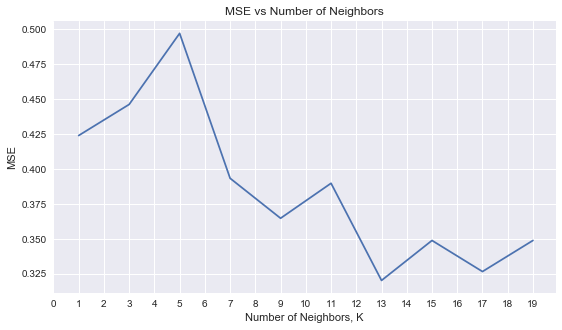

In [94]:
# mse equal to 1 - accruacy score
MSE = [1 - x for x in cv_scores]

# plot misclassification error vs k
plt.figure(figsize = (9, 5))
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors, K')
plt.ylabel('MSE')
plt.title("MSE vs Number of Neighbors")
plt.xticks(np.arange(0, 20, step=1))

#### Conclusion
To answer question 3, we first used the latitude and longitude coordinates in order to create a dataframe that shows the area of the country the location is (either East or West). We used K-nearest neighbors classification with 5-fold cross-validation in order to create a model that can predict the region of the U.S. based on the disease risk factors from the dataset. We were able to create a model that can predict the region of the U.S. based on risk factors by using different factors to create a training and test set. The model had an about 68% percent accuracy when there are 13 neighbors. 

#### Links to datasets
Behavioral Risk Factor Data: Heart Disease and Stroke Prevention
https://catalog.data.gov/dataset/behavioral-risk-factor-data-heart-disease-amp-stroke-prevention-67c1f 


Nutrition, Physical Activity, and Obesity - American Community Survey
https://catalog.data.gov/dataset/nutrition-physical-activity-and-obesity-american-community-survey-abe59 